In [1008]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [1009]:
var_path = r"News_datasett.csv"
var = pd.read_csv(var_path, sep=';')


In [1010]:
var

,File_Name,Content,Category,Complete_Filename
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business
...,...,...,...,...
2220,397.txt,BT program to beat dialler scams\r\n\r\nBT is ...,tech,397.txt-tech
2221,398.txt,Spam e-mails tempt net shoppers\r\n\r\nCompute...,tech,398.txt-tech
2222,399.txt,Be careful how you code\r\n\r\nA new European ...,tech,399.txt-tech
2223,400.txt,US cyber security chief resigns\r\n\r\nThe man...,tech,400.txt-tech


In [1011]:
var["Content"].str.len()

0        2569
1        2257
2        1557
3        2421
4        1575
        ...  
2220     2526
2221     2294
2222     6297
2223     2323
2224    16248
Name: Content, Length: 2225, dtype: int64

In [1012]:
var["Content"].str.len().max()

25596

In [1013]:
var["Content"].str.len().idxmax()

1185

In [1014]:
var["News_length"]=var["Content"].str.len()

In [1015]:
var

,File_Name,Content,Category,Complete_Filename,News_length
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business,2257
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business,1557
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business,2421
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business,1575
...,...,...,...,...,...
2220,397.txt,BT program to beat dialler scams\r\n\r\nBT is ...,tech,397.txt-tech,2526
2221,398.txt,Spam e-mails tempt net shoppers\r\n\r\nCompute...,tech,398.txt-tech,2294
2222,399.txt,Be careful how you code\r\n\r\nA new European ...,tech,399.txt-tech,6297
2223,400.txt,US cyber security chief resigns\r\n\r\nThe man...,tech,400.txt-tech,2323


In [1016]:
var["News_length"].min()

506

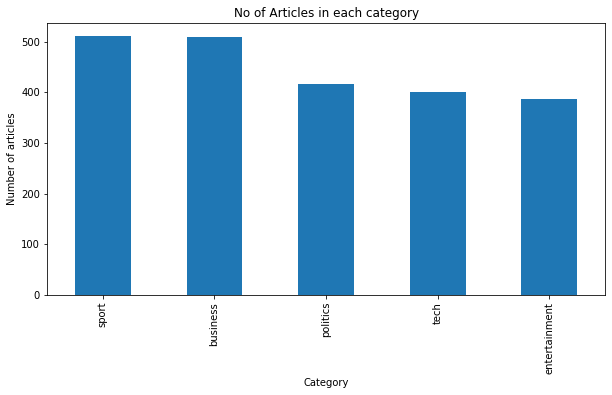

In [1017]:
var.Category.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("No of Articles in each category")
plt.ylabel('Number of articles')
plt.xlabel('Category');

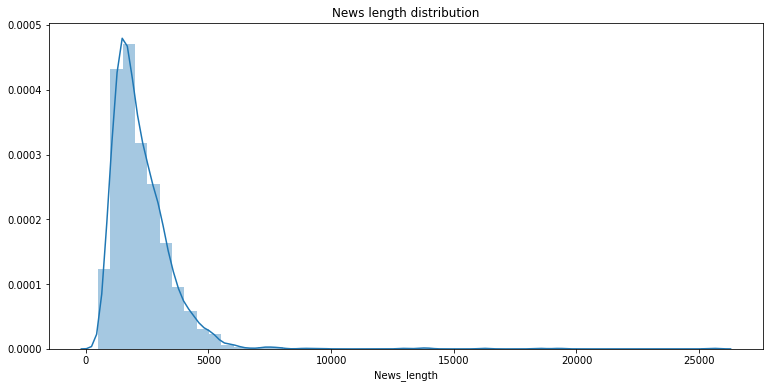

In [1018]:
plt.figure(figsize=(12.8,6))
sns.distplot(var['News_length']).set_title('News length distribution');

In [1019]:
df=var[var["Content"].str.len()>10000]
len(df)

7

In [1020]:
#df

In [1021]:
pd.to_pickle(var,"News_dataset2.pickle")

In [1022]:
df=pd.read_pickle("News_dataset2.pickle")

In [1023]:
df.head()

,File_Name,Content,Category,Complete_Filename,News_length
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business,2257
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business,1557
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business,2421
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business,1575


#  Text cleaning and preparation

In [1024]:
#import re
#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

# remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#def clean_text(text):
#    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 

#    return text
#df['Content'] = df['Content'].apply(clean_text)

In [1025]:
#Special character cleaning

In [1026]:
df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('"', '')
#df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('\d', '')

In [1027]:
#Upcase/downcase

In [1028]:
df['Content_Parsed_2']=df['Content_Parsed_1'].str.lower()

In [1029]:
#Punctuation signs

In [1030]:
punctuation_signs = list("?:!.,;")
df['Content_Parsed_3'] = df['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')

In [1031]:
#Possessive pronouns

In [1032]:
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s","")

# Stop Words

In [477]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1033]:
stop_words = list(stopwords.words('english'))

In [1034]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [1035]:
df['Content_Parsed_5'] = df['Content_Parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_5'] = df['Content_Parsed_5'].str.replace(regex_stopword, '')

# Lemmatization
### Reduce a word to its root or base unit

In [963]:
#nltk.download()

# Downloading punkt and wordnet from NLTK
#nltk.download('punkt')
#print("------------------------------------------------------------")
#nltk.download('wordnet')

In [1036]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()

In [1037]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    lemmatized_list = []
    text = df.loc[row]['Content_Parsed_5']
    text_words = text.split(" ")
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    lemmatized_text = " ".join(lemmatized_list)
    lemmatized_text_list.append(lemmatized_text)

In [1038]:
df['Content_Parsed_6'] = lemmatized_text_list

In [1039]:
df

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569,Ad sales boost Time Warner profit Quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...
1,002.txt,Dollar gains on Greenspan speech\r\n\r\nThe do...,business,002.txt-business,2257,Dollar gains on Greenspan speech The dollar ha...,dollar gains on greenspan speech the dollar ha...,dollar gains on greenspan speech the dollar ha...,dollar gains on greenspan speech the dollar ha...,dollar gains greenspan speech dollar hit h...,dollar gain greenspan speech dollar hit hi...
2,003.txt,Yukos unit buyer faces loan claim\r\n\r\nThe o...,business,003.txt-business,1557,Yukos unit buyer faces loan claim The owners o...,yukos unit buyer faces loan claim the owners o...,yukos unit buyer faces loan claim the owners o...,yukos unit buyer faces loan claim the owners o...,yukos unit buyer faces loan claim owners emb...,yukos unit buyer face loan claim owners emba...
3,004.txt,High fuel prices hit BA's profits\r\n\r\nBriti...,business,004.txt-business,2421,High fuel prices hit BA's profits British Airw...,high fuel prices hit ba's profits british airw...,high fuel prices hit ba's profits british airw...,high fuel prices hit ba profits british airway...,high fuel prices hit ba profits british airway...,high fuel price hit ba profit british airways ...
4,005.txt,Pernod takeover talk lifts Domecq\r\n\r\nShare...,business,005.txt-business,1575,Pernod takeover talk lifts Domecq Shares in UK...,pernod takeover talk lifts domecq shares in uk...,pernod takeover talk lifts domecq shares in uk...,pernod takeover talk lifts domecq shares in uk...,pernod takeover talk lifts domecq shares uk d...,pernod takeover talk lift domecq share uk dri...
...,...,...,...,...,...,...,...,...,...,...,...
2220,397.txt,BT program to beat dialler scams\r\n\r\nBT is ...,tech,397.txt-tech,2526,BT program to beat dialler scams BT is introdu...,bt program to beat dialler scams bt is introdu...,bt program to beat dialler scams bt is introdu...,bt program to beat dialler scams bt is introdu...,bt program beat dialler scams bt introducing...,bt program beat dialler scam bt introduce tw...
2221,398.txt,Spam e-mails tempt net shoppers\r\n\r\nCompute...,tech,398.txt-tech,2294,Spam e-mails tempt net shoppers Computer users...,spam e-mails tempt net shoppers computer users...,spam e-mails tempt net shoppers computer users...,spam e-mails tempt net shoppers computer users...,spam e-mails tempt net shoppers computer users...,spam e-mail tempt net shoppers computer users ...
2222,399.txt,Be careful how you code\r\n\r\nA new European ...,tech,399.txt-tech,6297,Be careful how you code A new European directi...,be careful how you code a new european directi...,be careful how you code a new european directi...,be careful how you code a new european directi...,careful code new european directive could ...,careful code new european directive could ...
2223,400.txt,US cyber security chief resigns\r\n\r\nThe man...,tech,400.txt-tech,2323,US cyber security chief resigns The man making...,us cyber security chief resigns the man making...,us cyber security chief resigns the man making...,us cyber security chief resigns the man making...,us cyber security chief resigns man making su...,us cyber security chief resign man make sure ...


In [1040]:
#df.loc[5]['Content']

In [1041]:
df.loc[5]['Content_Parsed_1']

"Japan narrowly escapes recession Japan's economy teetered on the brink of a technical recession in the three months to September, figures show. Revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. A common technical definition of a recession is two successive quarters of negative growth. The government was keen to play down the worrying implications of the data. I maintain the view that Japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully, said economy minister Heizo Takenaka. But in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. It's painting a picture of a recovery... much patchier than previously thought, said Paul Sheard, econo

In [1042]:
#lower
df.loc[5]['Content_Parsed_2']

"japan narrowly escapes recession japan's economy teetered on the brink of a technical recession in the three months to september, figures show. revised figures indicated growth of just 0.1% - and a similar-sized contraction in the previous quarter. on an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought. a common technical definition of a recession is two successive quarters of negative growth. the government was keen to play down the worrying implications of the data. i maintain the view that japan's economy remains in a minor adjustment phase in an upward climb, and we will monitor developments carefully, said economy minister heizo takenaka. but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead, observers were less sanguine. it's painting a picture of a recovery... much patchier than previously thought, said paul sheard, econo

In [1043]:
#punctuation
df.loc[5]['Content_Parsed_3']

"japan narrowly escapes recession japan's economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just 01% - and a similar-sized contraction in the previous quarter on an annual basis the data suggests annual growth of just 02% suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan's economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it's painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman broth

In [1044]:
#possessive pronouns
df.loc[5]['Content_Parsed_4']

'japan narrowly escapes recession japan economy teetered on the brink of a technical recession in the three months to september figures show revised figures indicated growth of just 01% - and a similar-sized contraction in the previous quarter on an annual basis the data suggests annual growth of just 02% suggesting a much more hesitant recovery than had previously been thought a common technical definition of a recession is two successive quarters of negative growth the government was keen to play down the worrying implications of the data i maintain the view that japan economy remains in a minor adjustment phase in an upward climb and we will monitor developments carefully said economy minister heizo takenaka but in the face of the strengthening yen making exports less competitive and indications of weakening economic conditions ahead observers were less sanguine it painting a picture of a recovery much patchier than previously thought said paul sheard economist at lehman brothers in

In [1045]:
df.loc[5]['Content_Parsed_5']

'japan narrowly escapes recession japan economy teetered   brink   technical recession   three months  september figures show revised figures indicated growth   01% -   similar-sized contraction   previous quarter   annual basis  data suggests annual growth   02% suggesting  much  hesitant recovery   previously  thought  common technical definition   recession  two successive quarters  negative growth  government  keen  play   worrying implications   data  maintain  view  japan economy remains   minor adjustment phase   upward climb    monitor developments carefully said economy minister heizo takenaka    face   strengthening yen making exports less competitive  indications  weakening economic conditions ahead observers  less sanguine  painting  picture   recovery much patchier  previously thought said paul sheard economist  lehman brothers  tokyo improvements   job market apparently  yet  feed   domestic demand  private consumption   02%   third quarter'

In [1046]:
df.loc[5]['Content_Parsed_6']

'japan narrowly escape recession japan economy teeter   brink   technical recession   three months  september figure show revise figure indicate growth   01% -   similar-sized contraction   previous quarter   annual basis  data suggest annual growth   02% suggest  much  hesitant recovery   previously  think  common technical definition   recession  two successive quarter  negative growth  government  keen  play   worry implications   data  maintain  view  japan economy remain   minor adjustment phase   upward climb    monitor developments carefully say economy minister heizo takenaka    face   strengthen yen make export less competitive  indications  weaken economic condition ahead observers  less sanguine  paint  picture   recovery much patchier  previously think say paul sheard economist  lehman brothers  tokyo improvements   job market apparently  yet  fee   domestic demand  private consumption   02%   third quarter'

In [1047]:
df.head(1)

,File_Name,Content,Category,Complete_Filename,News_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,001.txt,Ad sales boost Time Warner profit\r\n\r\nQuart...,business,001.txt-business,2569,Ad sales boost Time Warner profit Quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...,ad sales boost time warner profit quarterly pr...


In [1048]:
list_columns = ["File_Name", "Category", "Complete_Filename", "Content", "Content_Parsed_6"]
df = df[list_columns]

df = df.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [1049]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed
0,001.txt,business,001.txt-business,Ad sales boost Time Warner profit\r\n\r\nQuart...,ad sales boost time warner profit quarterly pr...
1,002.txt,business,002.txt-business,Dollar gains on Greenspan speech\r\n\r\nThe do...,dollar gain greenspan speech dollar hit hi...
2,003.txt,business,003.txt-business,Yukos unit buyer faces loan claim\r\n\r\nThe o...,yukos unit buyer face loan claim owners emba...
3,004.txt,business,004.txt-business,High fuel prices hit BA's profits\r\n\r\nBriti...,high fuel price hit ba profit british airways ...
4,005.txt,business,005.txt-business,Pernod takeover talk lifts Domecq\r\n\r\nShare...,pernod takeover talk lift domecq share uk dri...


In [1050]:
df['Content_Parsed'].loc[0]

"ad sales boost time warner profit quarterly profit  us media giant timewarner jump 76%  $113bn (â£600m)   three months  december  $639m year-earlier  firm    one   biggest investors  google benefit  sales  high-speed internet connections  higher advert sales timewarner say fourth quarter sales rise 2%  $111bn  $109bn  profit  buoy  one- gain  offset  profit dip  warner bros  less users  aol time warner say  friday    own 8%  search-engine google    internet business aol   mix fortunes  lose 464000 subscribers   fourth quarter profit  lower    precede three quarter however  company say aol underlie profit  exceptional items rise 8%   back  stronger internet advertise revenues  hop  increase subscribers  offer  online service free  timewarner internet customers   try  sign  aol exist customers  high-speed broadband timewarner also   restate 2000  2003 result follow  probe   us securities exchange commission (sec)   close  conclude time warner fourth quarter profit  slightly better  anal

# Label Coding

In [1051]:
category_codes = {
    'business': 0,
    'entertainment': 1,
    'politics': 2,
    'sport': 3,
    'tech': 4
}

In [1052]:
# Category mapping
df['Category_Code'] = df['Category']
df = df.replace({'Category_Code':category_codes})

In [1053]:
df.head()

,File_Name,Category,Complete_Filename,Content,Content_Parsed,Category_Code
0,001.txt,business,001.txt-business,Ad sales boost Time Warner profit\r\n\r\nQuart...,ad sales boost time warner profit quarterly pr...,0
1,002.txt,business,002.txt-business,Dollar gains on Greenspan speech\r\n\r\nThe do...,dollar gain greenspan speech dollar hit hi...,0
2,003.txt,business,003.txt-business,Yukos unit buyer faces loan claim\r\n\r\nThe o...,yukos unit buyer face loan claim owners emba...,0
3,004.txt,business,004.txt-business,High fuel prices hit BA's profits\r\n\r\nBriti...,high fuel price hit ba profit british airways ...,0
4,005.txt,business,005.txt-business,Pernod takeover talk lifts Domecq\r\n\r\nShare...,pernod takeover talk lift domecq share uk dri...,0


# Train - test split

In [982]:
X_train,X_test,y_train,y_test=train_test_split(df['Content_Parsed'],df['Category_Code'],test_size=0.15,  random_state=42)

In [983]:
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)

(1891,) (1891,)
(334,) (334,)


# Text Representation

In [987]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 5000


In [989]:
#Finally we will transform X_train and X_test to vectorized features_train and features_test. 
#These will now contain for each row a list of unique integer number and its associated importance as calculated by TF-IDF.
tfidf = TfidfVectorizer(ngram_range=ngram_range,max_df=max_df,
                        min_df=min_df,max_features=max_features)
features_train = tfidf.fit_transform(X_train)
labels_train = y_train
features_test = tfidf.transform(X_test)
labels_test = y_test
print(features_train.shape, features_test.shape)

(1891, 5000) (334, 5000)


In [994]:
# X_train
#with open('X_train.pickle', 'wb') as output:
#    pickle.dump(X_train, output)
pd.to_pickle(X_train,"X_train.pickle")

# X_test    
#with open('X_test.pickle', 'wb') as output:
#    pickle.dump(X_test, output)
pd.to_pickle(X_test,"X_test.pickle")  

# y_train
#with open('y_train.pickle', 'wb') as output:
#    pickle.dump(y_train, output)
pd.to_pickle(y_train,"y_train.pickle")    

# y_test
#with open('y_test.pickle', 'wb') as output:
#    pickle.dump(y_test, output)
pd.to_pickle(y_test,"y_test.pickle") 

# df
#with open('df.pickle', 'wb') as output:
#    pickle.dump(df, output)
pd.to_pickle(df,"df.pickle") 

# features_train
#with open('features_train.pickle', 'wb') as output:
#    pickle.dump(features_train, output)
pd.to_pickle(features_train,"features_train.pickle") 

# labels_train
#with open('labels_train.pickle', 'wb') as output:
#    pickle.dump(labels_train, output)
pd.to_pickle(labels_train,"labels_train.pickle")
    
# features_test
#with open('features_test.pickle', 'wb') as output:
#    pickle.dump(features_test, output)
pd.to_pickle(features_test,"features_test.pickle") 

# labels_test
#with open('labels_test.pickle', 'wb') as output:
#    pickle.dump(labels_test, output)
pd.to_pickle(labels_test,"labels_test.pickle") 
    
# TF-IDF object
#with open('tfidf.pickle', 'wb') as output:
#    pickle.dump(tfidf, output)
pd.to_pickle(tfidf,"tfidf.pickle") 

In [995]:
pd.read_pickle("X_train.pickle")
pd.read_pickle("X_test.pickle")
pd.read_pickle("y_train.pickle")
pd.read_pickle("y_test.pickle")
pd.read_pickle("df.pickle")
pd.read_pickle("features_train.pickle")
pd.read_pickle("labels_train.pickle")
pd.read_pickle("features_test.pickle")
pd.read_pickle("labels_test.pickle")
pd.read_pickle("tfidf.pickle")

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=10, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [996]:
#Now our data sets are ready.

In [997]:
print(features_train.shape)
print(features_test.shape)

(1891, 5000)
(334, 5000)


# Support Vector Machine

In [998]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(features_train,labels_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(features_train)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, labels_train)*100)

SVM Accuracy Score ->  100.0


In [999]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(features_train,labels_train)
# predict the labels on validation dataset
predictions_SVM2 = SVM.predict(features_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM2,labels_test)*100)

SVM Accuracy Score ->  97.30538922155688


In [1000]:
print("Classification report")
print(classification_report(labels_test,predictions_SVM2))

Classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        96
           1       0.98      0.96      0.97        55
           2       0.91      0.96      0.94        54
           3       0.99      1.00      0.99        73
           4       0.98      0.98      0.98        56

    accuracy                           0.97       334
   macro avg       0.97      0.97      0.97       334
weighted avg       0.97      0.97      0.97       334



In [1001]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(predictions_SVM, labels_train)*100,
     'Test Set Accuracy': accuracy_score(predictions_SVM2,labels_test)*100
}

df_models_svc = pd.DataFrame(d, index=[0])

In [1002]:
df_models_svc

,Model,Training Set Accuracy,Test Set Accuracy
0,SVM,100.0,97.305389


In [1003]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
print(svc_0.get_params())

Parameters currently in use:

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 8, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [1004]:
#C: Penalty parameter C of the error term.
#kernel: Specifies the kernel type to be used in the algorithm.
#gamma: Kernel coefficient.
#degree: Degree of the polynomial kernel function.

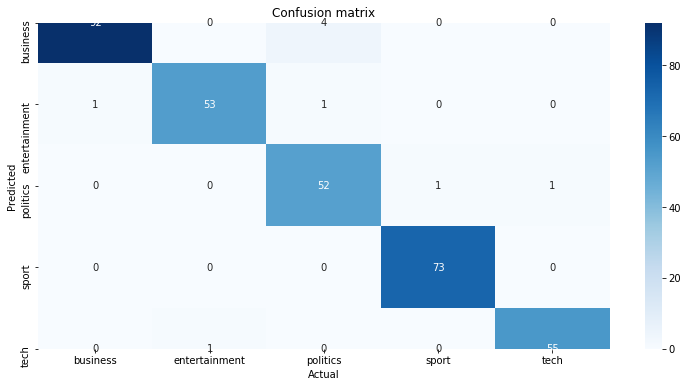

In [1005]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, predictions_SVM2)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [1007]:
with open('best_svc.pickle', 'wb') as output:
    pickle.dump(SVM, output)
    
with open('df_models_svc.pickle', 'wb') as output:
    pickle.dump(df_models_svc, output)